In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/sales_data_sample.csv', index_col='ORDERNUMBER', encoding='Latin-1')

In [4]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   obj

In [8]:
df.isnull()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
10121,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
10134,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
10145,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
10159,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
10373,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
10386,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [10]:
df.isnull().sum()

QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [12]:
df.replace(np.NaN,0, inplace=True)

In [13]:
df.isnull().value_counts().sum()

2823

In [14]:
df.head(10)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,0,NYC,NY,10022,USA,0,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,0,Reims,0,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,0,Paris,0,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,0,Pasadena,CA,90003,USA,0,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,0,San Francisco,CA,0,USA,0,Brown,Julie,Medium
10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,...,9408 Furth Circle,0,Burlingame,CA,94217,USA,0,Hirano,Juri,Medium
10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,Motorcycles,...,"184, chausse de Tournai",0,Lille,0,59000,France,EMEA,Rance,Martine,Small
10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,Motorcycles,...,"Drammen 121, PR 744 Sentrum",0,Bergen,0,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,Motorcycles,...,5557 North Pendale Street,0,San Francisco,CA,0,USA,0,Murphy,Julie,Small


In [16]:
df.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


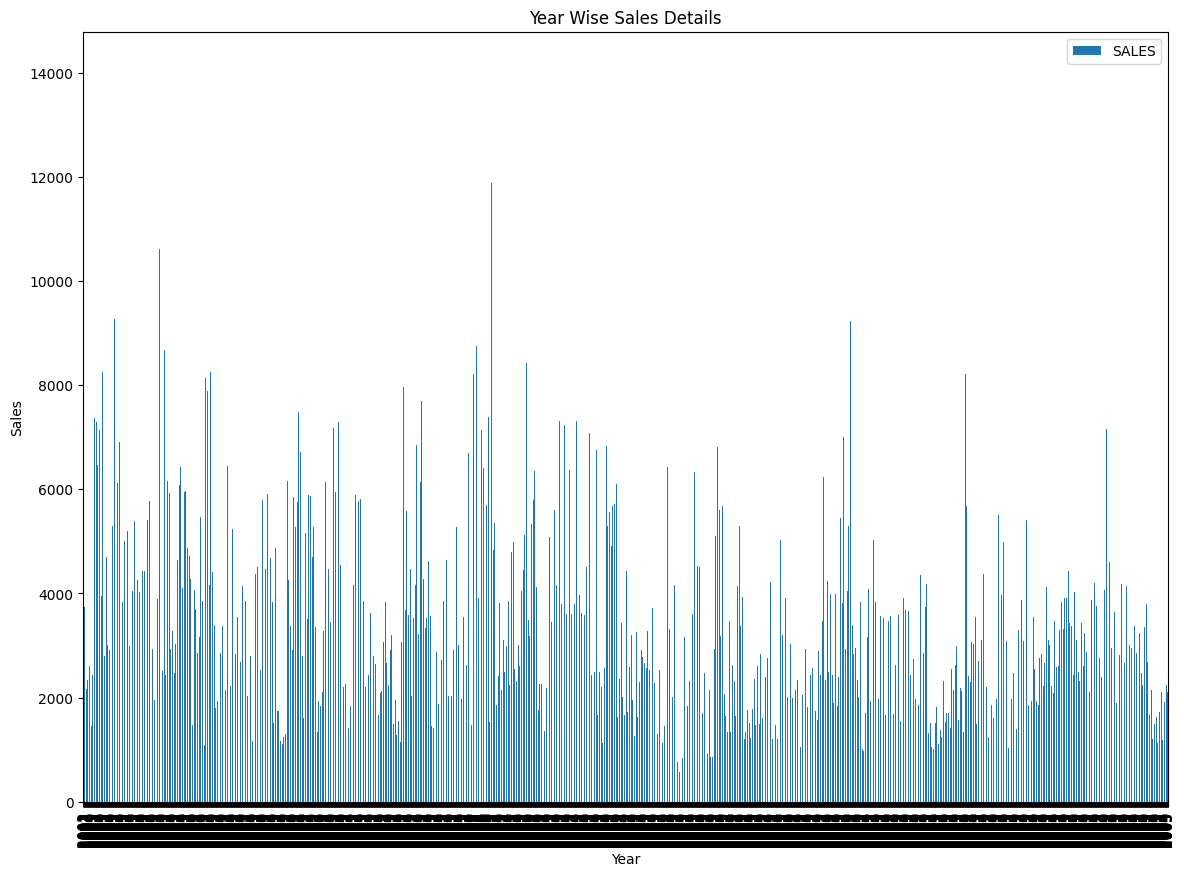

In [17]:
df.plot(kind='bar',x='YEAR_ID',y='SALES',figsize=(14,10))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Year Wise Sales Details')
plt.show()

In [18]:
ms=df.groupby(['MONTH_ID','YEAR_ID'])['SALES'].sum().reset_index()

In [19]:
ms.head()

,MONTH_ID,YEAR_ID,SALES
0,1,2003,129753.60
1,1,2004,316577.42
2,1,2005,339543.42
3,2,2003,140836.19
4,2,2004,311419.53


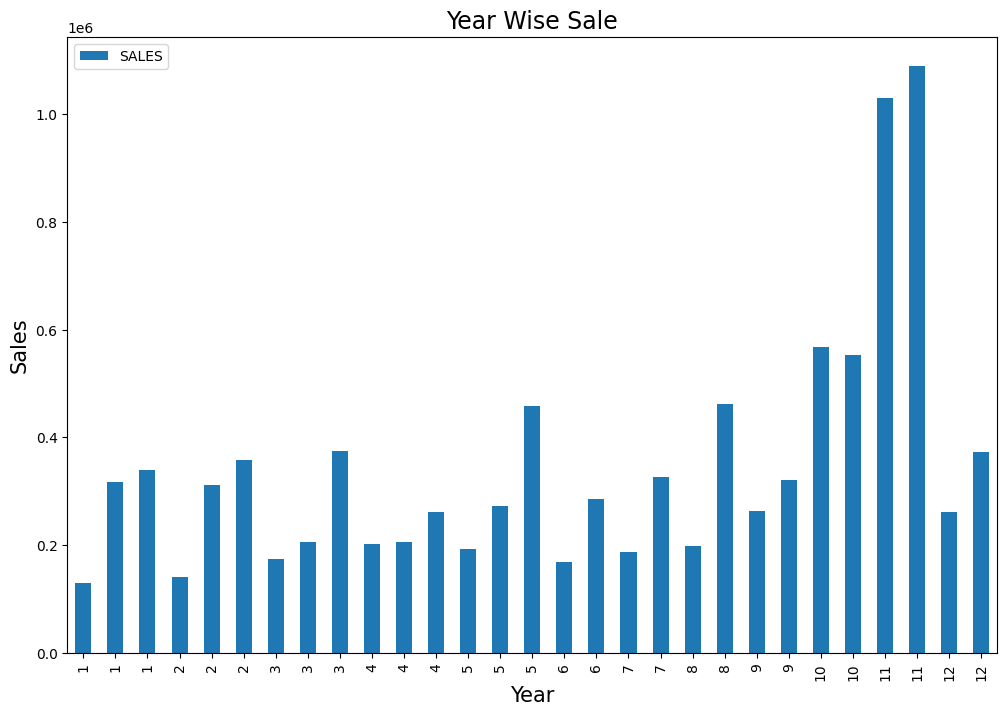

In [20]:
ms.plot(kind='bar',x='MONTH_ID',y='SALES',figsize=(12,8))
plt.title('Year Wise Sale',fontsize=17)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.show()

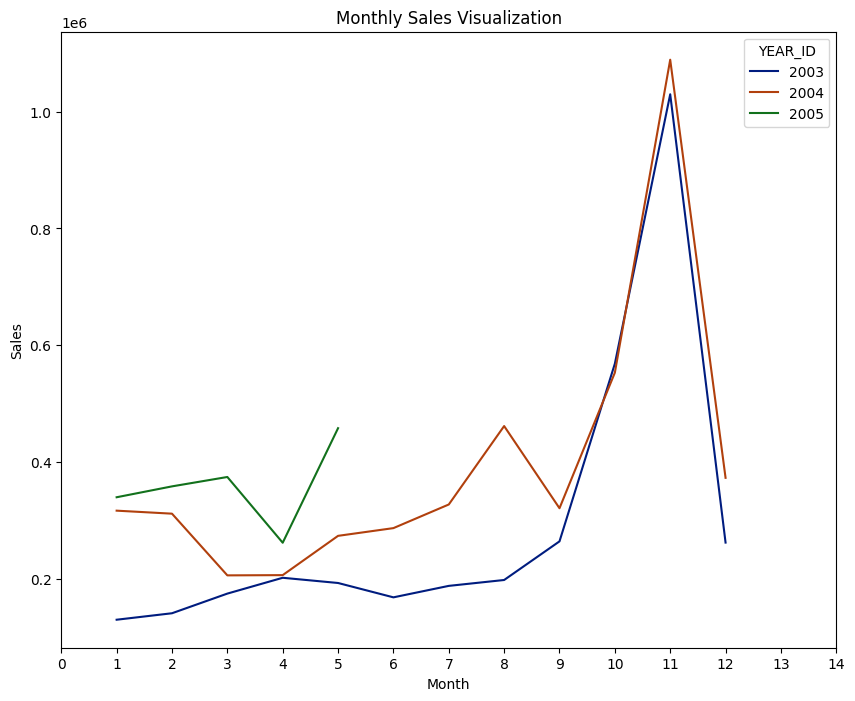

In [21]:
plt.figure(figsize=(10,8))
plt.title('Monthly Sales Visualization')
s=sns.lineplot(data=ms,x='MONTH_ID',y='SALES',hue='YEAR_ID',errorbar=('ci',95),palette='dark')
sns.set_style('whitegrid')
plt.xlabel('Month')
plt.ylabel('Sales')
s.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

In [22]:
ys=df.groupby(['YEAR_ID'])['SALES'].sum().reset_index()
ys.head()

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


AttributeError: 'NoneType' object has no attribute 'get_bbox'

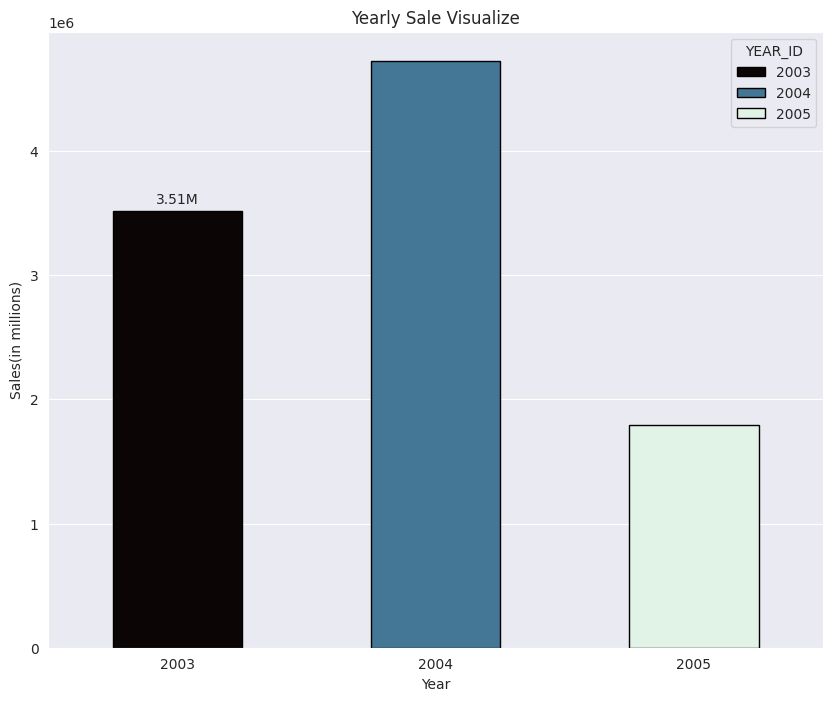

In [28]:
plt.figure(figsize=(10,8))
plt.title('Yearly Sale Visualize')
plt.xlabel('Year')
plt.ylabel('Sales(in millions)')

p=sns.barplot(data=ys,x='YEAR_ID',y='SALES',hue='YEAR_ID',palette='mako',edgecolor='black',width=0.5)
sns.set_style('darkgrid')


t=['3.51M','4.27M','1.27M']
p.bar_label(p.containers[0],labels=t,padding=3)
p.bar_label(p.containers[1],labels=t,padding=3)
p.bar_label(p.containers[2],labels=t,padding=3)

plt.legend(prop={'size':12})
plt.show()

In [29]:
qtrly = df.groupby(['PRODUCTLINE']).QTR_ID.value_counts().reset_index(name='COUNTS')
qtrly.head()

,PRODUCTLINE,QTR_ID,COUNTS
0,Classic Cars,4,392
1,Classic Cars,1,217
2,Classic Cars,3,183
3,Classic Cars,2,175
4,Motorcycles,4,117


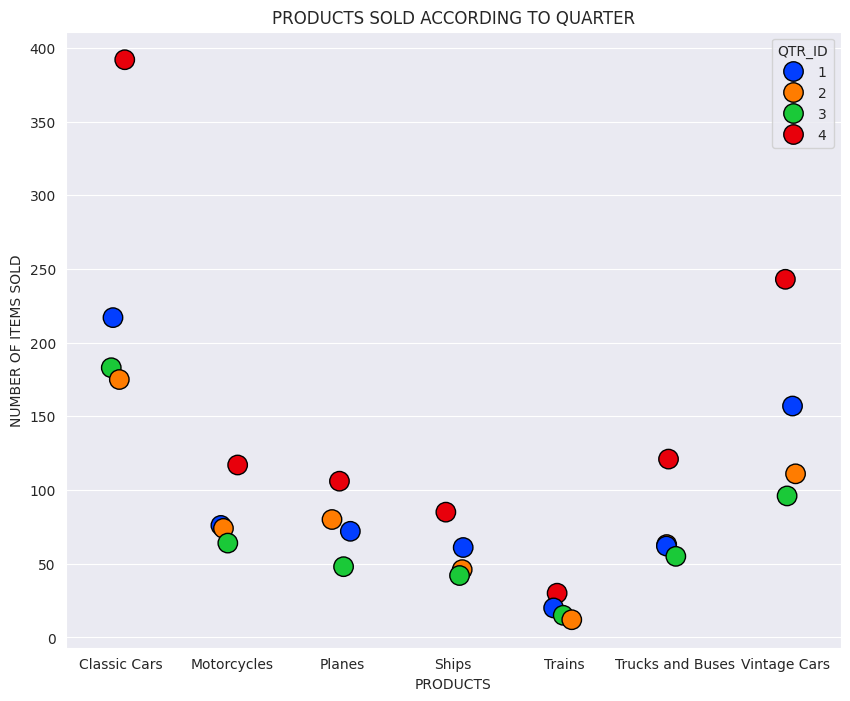

In [30]:
plt.figure(figsize=(10,8))

colors={'edgecolor':'black','linewidth':1}
sns.stripplot(x='PRODUCTLINE',y='COUNTS',data=qtrly,hue='QTR_ID',palette='bright',size=14,**colors)
sns.set_style('whitegrid')
plt.title("PRODUCTS SOLD ACCORDING TO QUARTER")
plt.xlabel('PRODUCTS')
plt.ylabel('NUMBER OF ITEMS SOLD')
plt.show()

In [31]:
products = df.groupby(['PRODUCTLINE'])['SALES'].sum().reset_index()
price = df.groupby(['PRODUCTLINE'])['MSRP'].min().reset_index()
result=pd.merge(products,price)
resultproducts = df.groupby(['PRODUCTLINE'])['SALES'].sum().reset_index()
price = df.groupby(['PRODUCTLINE'])['MSRP'].min().reset_index()
result=pd.merge(products,price)
result

,PRODUCTLINE,SALES,MSRP
0,Classic Cars,3919615.66,35
1,Motorcycles,1166388.34,40
2,Planes,975003.57,49
3,Ships,714437.13,54
4,Trains,226243.47,58
5,Trucks and Buses,1127789.84,54
6,Vintage Cars,1903150.84,33


AttributeError: 'NoneType' object has no attribute 'get_bbox'

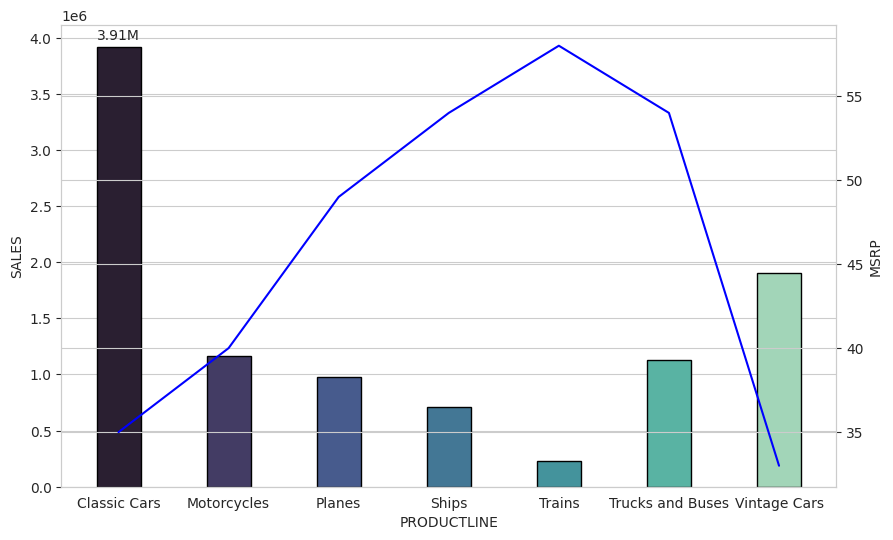

In [32]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='PRODUCTLINE',y='SALES',data=result,hue='PRODUCTLINE',palette='mako',  # barplot
                 edgecolor='black',dodge=False, width= 0.4)
ax2 = plt.twinx()

sns.lineplot(x='PRODUCTLINE',y='MSRP',data=result,ax=ax2,errorbar=None,color= 'b')
tb = ['3.91M','1.16M','975K','0.71M','0.22M','1.12M','1.90M']
ax.bar_label(ax.containers[0], labels=tb, padding=3)
ax.bar_label(ax.containers[1], labels=tb, padding=3)
ax.bar_label(ax.containers[2], labels=tb, padding=3)
ax.bar_label(ax.containers[3], labels=tb, padding=3)
ax.bar_label(ax.containers[4], labels=tb, padding=3)
ax.bar_label(ax.containers[5], labels=tb, padding=3)
ax.bar_label(ax.containers[6], labels=tb, padding=3)

sns.set_style('dark')
plt.title("PRODUCTS SOLD Vs SALES / MSRP")
ax.set(xlabel='PRODUCTS')
plt.show()